# GTZAN Genre Collection: Construir un clasificado


El [dataset](http://marsyas.info/downloads/datasets.html) consta de 1000 audios de 30 segundos en formato .wav de 10 géneros musicales distintos.

# Tarea: Construir un clasificador

¿Qué tan bien funciona en validación (10% random de cada género)? 
¿Qué features usar?

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import librosa

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_curve

# Analiso la data

Cargo los espectogramas correspondientes a cada cancion como data_set y tomo como label la carpeta a la que pertenece dicha cancion.

In [ ]:
def get_song_name(song):
    return (song.split(sep='/'))[2]

from glob import glob

base ="genres/"
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

spectograms={'blues':{}, 'classical':{}, 'country':{},
             'disco':{}, 'hiphop':{}, 'jazz':{}, 'metal':{},
             'pop':{}, 'reggae':{}, 'rock':{}}
labels = {}

for genre in genres:
    
    path = base+genre
    songs = sorted(glob(path+"/*.wav"))
    
    for song in songs:
        sig, rate = librosa.load(song,sr=44000)
        frequencies, times, spectrogram = signal.spectrogram(sig,rate)
        spectograms[genre][get_song_name(song)] = spectrogram.T

    labels[genre] = [ get_song_name(song) for song in songs ]

In [ ]:
spectograms

1

In [92]:
labels

{'blues': ['blues.00000.wav',
  'blues.00001.wav',
  'blues.00002.wav',
  'blues.00003.wav',
  'blues.00004.wav',
  'blues.00005.wav',
  'blues.00006.wav',
  'blues.00007.wav',
  'blues.00008.wav',
  'blues.00009.wav',
  'blues.00010.wav',
  'blues.00011.wav',
  'blues.00012.wav',
  'blues.00013.wav',
  'blues.00014.wav',
  'blues.00015.wav',
  'blues.00016.wav',
  'blues.00017.wav',
  'blues.00018.wav',
  'blues.00019.wav',
  'blues.00020.wav',
  'blues.00021.wav',
  'blues.00022.wav',
  'blues.00023.wav',
  'blues.00024.wav',
  'blues.00025.wav',
  'blues.00026.wav',
  'blues.00027.wav',
  'blues.00028.wav',
  'blues.00029.wav',
  'blues.00030.wav',
  'blues.00031.wav',
  'blues.00032.wav',
  'blues.00033.wav',
  'blues.00034.wav',
  'blues.00035.wav',
  'blues.00036.wav',
  'blues.00037.wav',
  'blues.00038.wav',
  'blues.00039.wav',
  'blues.00040.wav',
  'blues.00041.wav',
  'blues.00042.wav',
  'blues.00043.wav',
  'blues.00044.wav',
  'blues.00045.wav',
  'blues.00046.wav',
  'b

In [42]:
# Estudio canciones pop



path_pop = 'genres/pop/pop.00020.wav'


sig, rate = librosa.load(path_pop,sr=44000)

frequencies, times, spectrogram = signal.spectrogram(sig,rate)

spectrogram.append(spectrogram.T)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [26]:
# Escucho algunas canciones por diversion
import IPython.display as ipd
ipd.Audio(path)

In [40]:
5892*129/64

11876.0625

In [23]:
type(rate)

int

In [35]:
np.max(frequencies)

22000.0

In [36]:
frequencies

array([    0.   ,   171.875,   343.75 ,   515.625,   687.5  ,   859.375,
        1031.25 ,  1203.125,  1375.   ,  1546.875,  1718.75 ,  1890.625,
        2062.5  ,  2234.375,  2406.25 ,  2578.125,  2750.   ,  2921.875,
        3093.75 ,  3265.625,  3437.5  ,  3609.375,  3781.25 ,  3953.125,
        4125.   ,  4296.875,  4468.75 ,  4640.625,  4812.5  ,  4984.375,
        5156.25 ,  5328.125,  5500.   ,  5671.875,  5843.75 ,  6015.625,
        6187.5  ,  6359.375,  6531.25 ,  6703.125,  6875.   ,  7046.875,
        7218.75 ,  7390.625,  7562.5  ,  7734.375,  7906.25 ,  8078.125,
        8250.   ,  8421.875,  8593.75 ,  8765.625,  8937.5  ,  9109.375,
        9281.25 ,  9453.125,  9625.   ,  9796.875,  9968.75 , 10140.625,
       10312.5  , 10484.375, 10656.25 , 10828.125, 11000.   , 11171.875,
       11343.75 , 11515.625, 11687.5  , 11859.375, 12031.25 , 12203.125,
       12375.   , 12546.875, 12718.75 , 12890.625, 13062.5  , 13234.375,
       13406.25 , 13578.125, 13750.   , 13921.875, 

/tmp/ipykernel_320627/1099511882.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax = plt.pcolormesh(times, frequencies, spectrogram)


(0.002909090909090909, 29.993454545454547, 0.0, 22000.0)

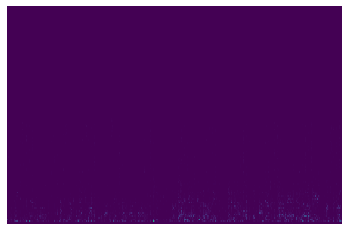

In [37]:
'''
Spectogram shows different frequencies playing at a particular time along with it’s amplitude
'''
ax = plt.pcolormesh(times, frequencies, spectrogram)
plt.axis('off')

## Separo la data de entrenamiento y la de test

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Aplico Scalling al dataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Propongo el baseline

Usaremos como baseline RandomForestClasification.

Este modelo tiene como ventaja que puede clasificar directamente entre un grupo de multiples clases.

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.fit(X_train, y_train)

In [ ]:
forest_clf.predict([some_digit])

# Metricas

In [ ]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#roc_auc_score(y_train, model.predict(X_train))